### Classification and prediction on linear modeled images with ConvLSTM-1 (Convolutional Neural Network)

  <td>
    <a target="_blank" href="https://github.com/RoboticsLabURJC/2020-tfg-alvaro-martin"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>

Once the modeled images are generate with the main_gen.py script (You can find it in Generator folder), we create Generator_10 folder with includes all the linear modeled images used for this prediction.
With this files we will try to to evaluate predictions and accuracy of the model, learning to train and becoming familiar with Convolutional Neural Networks testing this dataset.

In [41]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import shutil
import string

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Flatten, LSTM, ConvLSTM2D, \
    TimeDistributed
from keras.utils import vis_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

print(tf.__version__)

2.4.0-dev20201019


In [16]:
datashet_path = '/Users/Martin/Desktop/Generator/Frames_dataset/linear_point_255_fix_6000_80_120'

os.listdir(datashet_path)

['linear_10_[None]_train', 'linear_10_[None]_test', 'linear_10_[None]_val']

In [20]:
train_path = os.path.join(datashet_path, 'linear_10_[None]_train/modeled_samples')
os.listdir(train_path)

['sample1992.txt',
 'sample2243.txt',
 'sample2525.txt',
 'sample694.txt',
 'sample858.txt',
 'sample1038.txt',
 'sample680.txt',
 'sample2531.txt',
 'sample3149.txt',
 'sample2257.txt',
 'sample1986.txt',
 'sample3161.txt',
 'sample1776.txt',
 'sample870.txt',
 'sample1010.txt',
 'sample2519.txt',
 'sample3607.txt',
 'sample3613.txt',
 'sample864.txt',
 'sample1004.txt',
 'sample1762.txt',
 'sample3175.txt',
 'sample2280.txt',
 'sample1951.txt',
 'sample1789.txt',
 'sample131.txt',
 'sample657.txt',
 'sample3820.txt',
 'sample3834.txt',
 'sample643.txt',
 'sample1945.txt',
 'sample125.txt',
 'sample2294.txt',
 'sample12.txt',
 'sample3808.txt',
 'sample1979.txt',
 'sample119.txt',
 'sample496.txt',
 'sample3439.txt',
 'sample2727.txt',
 'sample2041.txt',
 'sample1548.txt',
 'sample2055.txt',
 'sample2733.txt',
 'sample482.txt',
 'sample3405.txt',
 'sample1212.txt',
 'sample1574.txt',
 'sample3363.txt',
 'sample2069.txt',
 'sample3377.txt',
 'sample1560.txt',
 'sample1206.txt',
 'sampl

In [18]:
test_path = os.path.join(datashet_path, 'linear_10_[None]_test/modeled_samples')
os.listdir(test_path)

['.DS_Store', 'parameters.txt', 'modeled_samples']

In [19]:
val_path = os.path.join(datashet_path, 'linear_10_[None]_val/modeled_samples')
os.listdir(val_path)

['.DS_Store', 'parameters.txt', 'modeled_samples']

In [22]:
sample_file = os.path.join(train_path, 'sample0.txt')
with open(sample_file) as f:
  print(f.read())

x,y
0,40
2,40
4,41
6,41
8,42
10,42
12,43
14,43
16,44
18,45
20,45
22,46
24,46
26,47
28,47
30,48
32,48
34,49
36,50
38,50
58,56



## Training the network...

Training with frames
Loading Modeled images
keras
Creating frame complex LSTM model
Training
/Users/Martin/Desktop/TFG/Proyecto Github/2020-tfg-alvaro-martin/Models/REC/Frames_dataset/linear_point_255_fix_6000_80_120_Modeled/convLSTM/10_False_tanh_mean_squared_error_10
Training model...
No batch data
Epoch 1/300
480/480 - 29s - loss: 3462.2224 - val_loss: 3079.7710

Epoch 00001: val_loss improved from inf to 3079.77100, saving model to /Users/Martin/Desktop/TFG/Proyecto Github/2020-tfg-alvaro-martin/Models/REC/Frames_dataset/linear_point_255_fix_6000_80_120_Modeled/convLSTM/10_False_tanh_mean_squared_error_10.h5
Epoch 2/300
480/480 - 19s - loss: 2753.9155 - val_loss: 2485.7483

Epoch 00002: val_loss improved from 3079.77100 to 2485.74829, saving model to /Users/Martin/Desktop/TFG/Proyecto Github/2020-tfg-alvaro-martin/Models/REC/Frames_dataset/linear_point_255_fix_6000_80_120_Modeled/convLSTM/10_False_tanh_mean_squared_error_10.h5
Epoch 3/300
480/480 - 19s - loss: 2240.9968 - val_loss:

480/480 - 18s - loss: 108.8408 - val_loss: 100.1831

Epoch 00026: val_loss improved from 121.09906 to 100.18311, saving model to /Users/Martin/Desktop/TFG/Proyecto Github/2020-tfg-alvaro-martin/Models/REC/Frames_dataset/linear_point_255_fix_6000_80_120_Modeled/convLSTM/10_False_tanh_mean_squared_error_10.h5
Epoch 27/300
480/480 - 18s - loss: 86.3989 - val_loss: 74.4607

Epoch 00027: val_loss improved from 100.18311 to 74.46067, saving model to /Users/Martin/Desktop/TFG/Proyecto Github/2020-tfg-alvaro-martin/Models/REC/Frames_dataset/linear_point_255_fix_6000_80_120_Modeled/convLSTM/10_False_tanh_mean_squared_error_10.h5
Epoch 28/300
480/480 - 18s - loss: 67.1917 - val_loss: 57.9394

Epoch 00028: val_loss improved from 74.46067 to 57.93943, saving model to /Users/Martin/Desktop/TFG/Proyecto Github/2020-tfg-alvaro-martin/Models/REC/Frames_dataset/linear_point_255_fix_6000_80_120_Modeled/convLSTM/10_False_tanh_mean_squared_error_10.h5
Epoch 29/300
480/480 - 18s - loss: 52.2710 - val_loss:

480/480 - 18s - loss: 0.3842 - val_loss: 0.2846

Epoch 00063: val_loss did not improve from 0.15508
Epoch 64/300
480/480 - 18s - loss: 0.4285 - val_loss: 0.2708

Epoch 00064: val_loss did not improve from 0.15508
Epoch 65/300
480/480 - 18s - loss: 0.3189 - val_loss: 0.6768

Epoch 00065: val_loss did not improve from 0.15508
Epoch 66/300
480/480 - 16s - loss: 0.4032 - val_loss: 0.2953

Epoch 00066: val_loss did not improve from 0.15508
Epoch 67/300
480/480 - 16s - loss: 0.2748 - val_loss: 0.1845

Epoch 00067: val_loss did not improve from 0.15508
Epoch 68/300
480/480 - 17s - loss: 0.4281 - val_loss: 0.2784

Epoch 00068: val_loss did not improve from 0.15508
Epoch 69/300
480/480 - 16s - loss: 0.2706 - val_loss: 0.2088

Epoch 00069: val_loss did not improve from 0.15508
End training
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


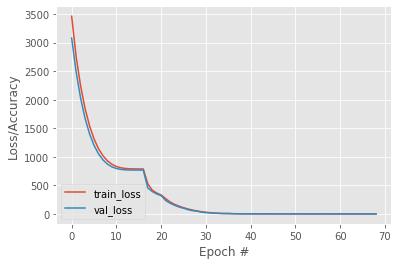

In [6]:
import sys
sys.path.insert(0, '/Users/Martin/Desktop/TFG/Proyecto Github/2020-tfg-alvaro-martin')

from Utils import utils, frame_utils
from Network import Net
import numpy as np

net_type = 'Rec'
activation = 'relu'
dropout = False
drop_percentage = float(0.2)
n_epochs = 300
batch_size = 10
patience = 10

data_dir = '/Users/Martin/Desktop/Generator_10/Frames_dataset/linear_point_255_fix_6000_80_120/linear_10_[None]_'
data_type = data_dir.split('/')[5]
func_type = data_dir.split('/')[6]

root = '/Users/Martin/Desktop/TFG/Proyecto Github/2020-tfg-alvaro-martin/Models/' + net_type.upper() + '/' + data_type + '/' + func_type
version = 1


print('Training with frames')
data_model = 'modeled'
samples_dir = data_dir.split('/')[6]
dim = (int(samples_dir.split('_')[-2]), int(samples_dir.split('_')[-1]))
complexity = 'convLSTM'

# Load data

print("Loading Modeled images")
batch_data = False
loss = 'mean_squared_error'
gauss_pixel = False
activation = 'tanh'
channels = False
dim = (int(samples_dir.split('_')[-2]), int(samples_dir.split('_')[-1]))
filename = root + "_Modeled/" + complexity

_, trainX, trainY = frame_utils.read_frame_data(data_dir + 'train/', 'modeled_samples', gauss_pixel)
_, valX, valY = frame_utils.read_frame_data(data_dir + 'val/', 'modeled_samples', gauss_pixel)
train_data = (trainX, trainY)
val_data = (valX, valY)

# Model settings
in_dim = trainX.shape[1:]
out_dim = np.prod(in_dim[1:])
if net_type == "NoRec":
    to_train_net = Net.Mlp(activation=activation, loss=loss, dropout=dropout,
                           drop_percentage=drop_percentage, input_shape=in_dim, output_shape=out_dim,
                           complexity=complexity, data_type="Frame", framework="tensorflow")
else:  # net_type == "Rec"
    to_train_net = Net.Lstm(activation=activation, loss=loss, dropout=dropout,
                            drop_percentage=drop_percentage, input_shape=in_dim, output_shape=out_dim,
                            complexity=complexity, data_type="Frame", framework="keras")    
    
# model_history = self.model.fit(data_train[0], data_train[1], batch_size=batch_size,
#                            epochs=n_epochs, validation_data=data_val,
#                            callbacks=[early_stopping, checkpoint], verbose=2)

print('Training')
to_train_net.train(n_epochs, batch_size, patience, filename, train_data, val_data, batch_data, gauss_pixel, channels)

## Test

Dataset: /Users/Martin/Desktop/Generator_10/Frames_dataset/linear_point_255_fix_6000_80_120/linear_10_[None]_test
Model: /Users/Martin/Desktop/TFG/Proyecto Github/2020-tfg-alvaro-martin/Models/REC/Frames_dataset/linear_point_255_fix_6000_80_120_Modeled/convLSTM/10_False_tanh_mean_squared_error_10.h5
Evaluating with linear_point_255_fix_6000_80_120 a linear_point_255_fix_6000_80_120_Modeled Models model
/Users/Martin/Desktop/Generator_10/Frames_dataset/linear_point_255_fix_6000_80_120/linear_10_[None]_test/modeled_samples
Puting the test data into the right shape...
tensorflow


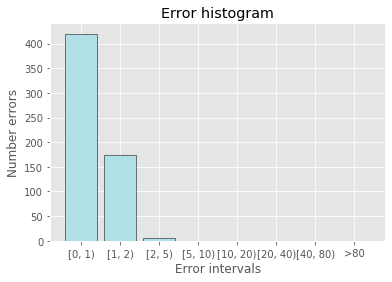

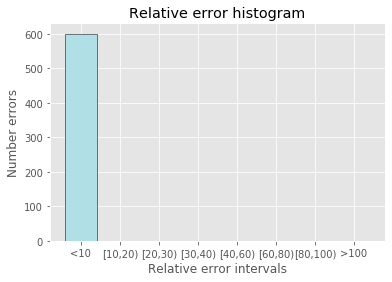

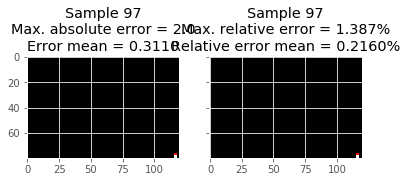

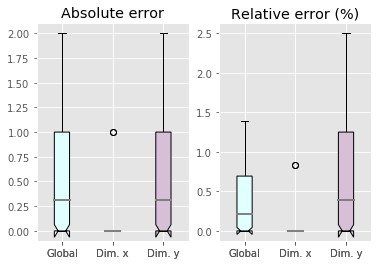

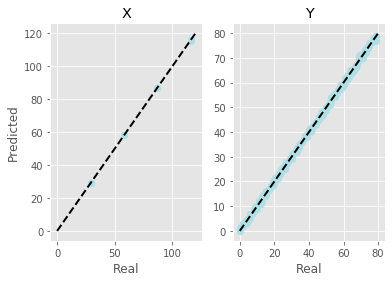

In [66]:
sys.path.insert(0, '/Users/Martin/Desktop/TFG/Proyecto Github/2020-tfg-alvaro-martin')

from Utils import utils, frame_utils
from Network import Net

data_path_test = '/Users/Martin/Desktop/Generator_10/Frames_dataset/linear_point_255_fix_6000_80_120/linear_10_[None]_test'
model_path = '/Users/Martin/Desktop/TFG/Proyecto Github/2020-tfg-alvaro-martin/Models/REC/Frames_dataset/linear_point_255_fix_6000_80_120_Modeled/convLSTM/10_False_tanh_mean_squared_error_10.h5'

data_type = data_path_test.split('/')[6]
net_type = model_path.split('/')[7]
complexity = model_path.split('/')[10]

print("Dataset: " + data_path_test)
print("Model: " + model_path)
print("Evaluating with " + data_type + " a " + complexity + " " + net_type + " model")

# Load data
# data_type == "Frames_dataset

data_path_test = data_path_test + "/modeled_samples"
print(data_path_test)
sample_type = data_path_test.split('/')[-1]
data_type = data_type + "_" + sample_type
samples_dir = data_path_test.split('/')[6]
dim = (int(samples_dir.split('_')[-2]), int(samples_dir.split('_')[-1]))

parameters, testX, testY = frame_utils.read_frame_data(data_path, sample_type, False)

# samples_paths = utils.get_files(f_path)
# dataX, dataY = get_modeled_samples(samples_paths)
#     for p in samples_paths:
#        sample = pd.read_csv(p)
#        positions = np.fliplr(sample.values).astype(np.float)
#        dataX.append(positions[:-1])
#        dataY.append(positions[-1])

#    return np.array(dataX), np.array(dataY)


print('Puting the test data into the right shape...')
to_test_net = Net.Lstm(model_file=model_path, framework="tensorflow")

gap = parameters.iloc[0]['gap']
to_test_net.test(testX, testY, gap, data_type, dim)

## Accuracy of the model

In [81]:
Error_Relativo_Medio = 0.2160
Accuracy = 100 - Error_Relativo_Medio
print('Accuracy: ' + str(Accuracy) + ' %')

Accuracy: 99.784 %
